## Network topology identification

In this problem, we are interested in the dynamical behaviors inside the networks of $n$ nodes. The networks can be represented by a graph 

$$
\mathcal{G}(\mathcal{V},\mathcal{E})
$$

The vertices, $\mathcal{V}=\{1,2,\dots, n\}$, represent nodes in the networks, and the edges $\mathcal{E}$ represent the connections between nodes where $(i,j) \in \mathcal{E}$ if node $i$ and $j$ are connected, and $(i,j) \notin \mathcal{E}$ otherwise. 

The neighbors of a node $i$, $\mathcal{N}_i$, is the set of nodes which are connected to node $i$, so $\mathcal{N}_i = \{ j\in\mathcal{V} | (i,j)\in\mathcal{E}\}$, and the node degree $d_i$ is defined by the number of node $i$'s neighboring nodes, so $d_i = | \mathcal{N}_i |$.

The graph $\mathcal{G}(\mathcal{V},\mathcal{E})$ can also be represented by a symmetric node adjacency matrix $\mathcal{A}$ where

$$
\mathcal{A}_{ij} = 
  \begin{cases}
    1, & \text{if } (i,j)\in\mathcal{E} \\
    0, & \text{otherwise} 
  \end{cases}
$$

We are especially interested in a kind of networked dynamics called _consensus_, from which the averaging behaviors over a fixed networks can be interpreted. Suppose $x_i(t)$ represents some quantity (quantified opinion or preference on some political situation, for example) of node $i$ at time $t$. Since each node is connected to its neighbours, through which its quantities are shared or mixed, $x_i(t+1)$ is affected by the neighbors opinions, so we have

$$
    x_i(t+1) = w_{ii} x_i(t) + \sum_{j\in\mathcal{N}_i} w_{ij}x_j(t)
$$

where 
$
    w_{ii} = 1- \sum_{j\in\mathcal{N}_i} w_{ij} 
$
, and $w_{ij} \ge 0, \forall i,j\in\mathcal{V}$, or 

$$
    x(t+1) = Wx(t)
$$

where $x(t) = [x_1^T(t) \ x_2^T(t) \ \cdots \ x_n^T(t)]^T$.
Note that the weighting matrix $W$ has the same sparsity pattern as $I+\mathcal{A}$, with $1+d_i$ nonzero elements in $i$-th row. Furthermore, it turns out that the largest eigenvalue of $W$ is 1 with the corresponding eigenvector $\frac{1}{\sqrt{n}}\mathbf{1}$, since $W\mathbf{1}=\mathbf{1}$. Therefore as $t\rightarrow\infty$, $x(t)\rightarrow\frac{1}{{n}}\mathbf{1}\mathbf{1}^Tx(0)$, reaching to _consensus_ for every $i\in\mathcal{V}$.

We also assume that there are $m$ adversarial nodes $i\in\mathcal{V}$ sending out some random signal $u_i(t)$ that disturbs the networks' consensus, so

$$
    x_i(t+1) = W_{ii} x_i(t) + \sum_{j\in\mathcal{N}_i} W_{ij}x_j(t) + b_i u_i(t)
$$

or in matrix form with $B = [b_1 \ \cdots \ b_m]$ and $u(t) = [u_1^T(t) \ \cdots \ u_m^T(t)]^T$, we have that,

$$
    x(t+1) = Wx(t) + Bu(t)
$$

Note that $W\in\mathbb{R}^{n\times n}$ has $n+\sum_{i\in\mathcal{V}}d_i$ nonzero values, and $B\in\mathbb{R}^{n\times m}$ has $m$ nonzero values, so they are quite sparse.

The following shows an example of $\mathcal{G}(\mathcal{V},\mathcal{E})$ with $n=20$ nodes, the node degrees $d$ and sample trajectories $x_1(t),\dots, x_{20}(t)$, with $m=2$ disturbance signal $u_1(t), u_2(t)$, for $t=0,1,\dots,8$.

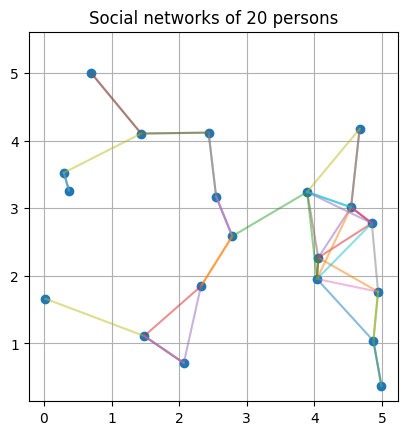

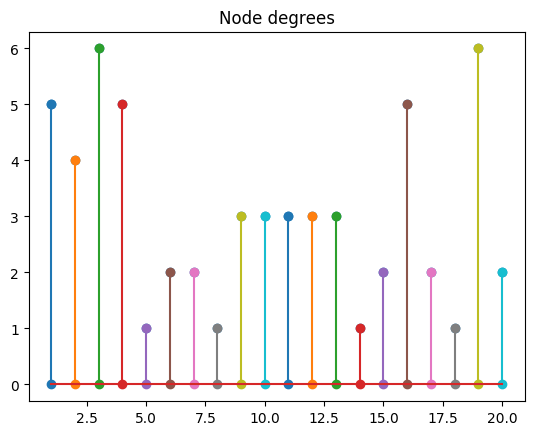

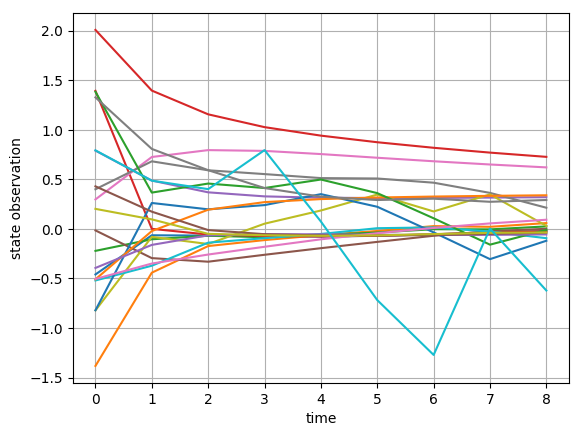

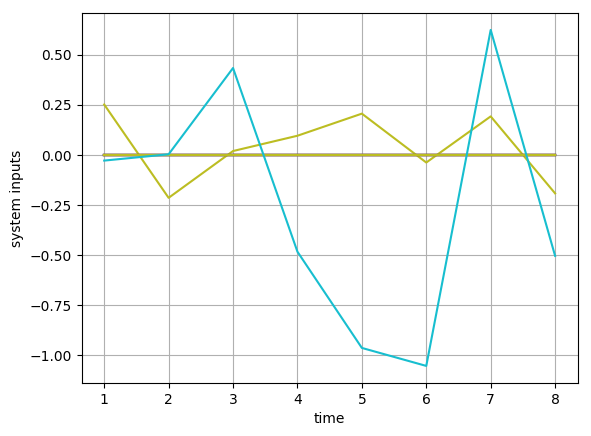

/usr/local/lib/python2.7/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [1]:
using PyPlot, Convex, ECOS;

srand(3);

n = 20;   # state dimension
m = 2;    # input dimension

pmax = 5; qmax = 5;
p = rand(n)*pmax;
q = rand(n)*qmax;
G = zeros(n,n);

figure();
plot(p, q, "o");
grid("on");
title("Social networks of $(n) persons");
axis("square");

for i=1:n
    dist = (p-p[i]).^2+(q-q[i]).^2
    j = sortperm(dist)[2]
    G[i,j] = 1;
    G[j,i] = 1;
    plot([p[i]; p[j]], [q[i]; q[j]], "-", alpha=0.5);
end

for i=1:n
    for j=i+1:n
        if norm([p[i];q[i]]-[p[j];q[j]]) < 1.3
            #if (sum(G[i,:])<4)
            G[i,j] = 1;
            G[j,i] = 1;
            plot([p[i]; p[j]], [q[i]; q[j]], "-", alpha=0.5);
            #end
        end
    end
end

d = sum(G,2);
W = zeros(n,n);
for i=1:n
    for j=i+1:n
        if G[i,j] == 1
            W[i,j] = 1/(1+max(d[i],d[j]))*(1+0.1*randn());
            #A[i,j] = 1/n;
            W[j,i] = W[i,j];
        end
    end
end

figure();
stem(1:n, sum(G,2), "o-");
title("Node degrees")
    

for i=1:n
    W[i,i] = 1 - sum(W[i,:]);
end;

rp = randperm(n);
#eye_n = eye(n,n);
eye_n = diagm(rand(n,1)[:]/2+0.5);
B = eye_n[:, rp[1:m]];
    
t = round(Int64, 0.4*n);
x0 = randn(n,1);
x = zeros(n,t+1);
u = 0.4*randn(m,t);
#u = ones(m,t);
#u[2,:] = -ones(1,t);
x[:,1] = x0;
for i=1:t
x[:,i+1] = W*x[:,i] + B*u[:,i];
end

#x += 0.001*randn(size(x));

figure();
grid("on");
plot(0:t,x');
xlabel("time");
ylabel("state observation");

figure();
grid("on");
plot(1:t,(B*u)');
xlabel("time");
ylabel("system inputs");

Now, the problem. You obtained a set of quantified opinion history data from social networks with 20 persons, $x_1(t),\dots, x_{20}(t)$ and the disturbance signal $u_1(t), u_2(t)$ (but you don't know who are sending outh such signals), for $t=0,1,\dots,8$.

Your job is figuring out something like,

- Who is the most influential persons? (We want post our ads on his wall.)
- Who is sending out the disturbance signals. (We will ask them to stop, or send them to jail.)
- Who is the most stubborn person? (We will take extra cares for him, or just give up arguing with him)

Note that the above questions can be simply answered by finding $W$ and $B$.
In order to handle this, we first observe from $x(t+1) = W x(t) + B u(t)$ that

$$
\begin{bmatrix} x(1) & x(2) & \cdots & x(T-1) \end{bmatrix} 
=\begin{bmatrix} W & B \end{bmatrix}
\begin{bmatrix} x(0) & x(1) & \cdots & x(T-1) \\ u(0) & u(1) & \cdots & u(T-1) \end{bmatrix}
$$

transposing results in our favorite form $y=X\theta$.
$$
\underbrace{\begin{bmatrix} x^T(1) \\ x^T(2) \\ \vdots \\ x^T(T) \end{bmatrix}}_{y}
=\underbrace{\begin{bmatrix} x^T(0) & u^T(0) \\ x^T(1) & u^T(1) \\ \vdots & \vdots \\ x^T(T-1) & u^T(T-1) \end{bmatrix}}_{X}
\underbrace{\begin{bmatrix} W^T \\ B^T \end{bmatrix}}_{\theta}
$$




In [2]:
X = [x[:,1:t]' u'];
y = x[:,2:t+1]';

So your job is simply finding some $\theta$ that minimizes

$$
    \left\| X\theta -y \right\|_2^2
$$

However, notice that $X\in\mathbb{R}^{8\times 22}$ in this problem, and the the problem is underdetermined, so we will solve something like

$$
\text{minimize}_{\theta}\quad \left\| X\theta - y  \right\|_2^2 + \lambda\left\| \theta \right\|_p
$$

Since our $\theta$ is quite sparse, our intuition will naturally choose $p=1$.

We will choose $p=1,2$ and scan $\lambda$ over $10^{-5} \le \lambda \le 10^{-2}$.

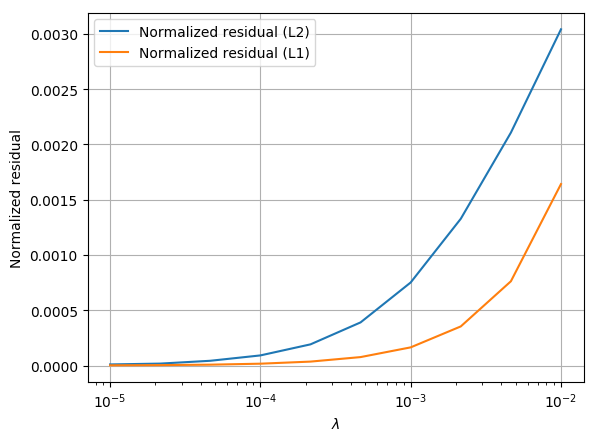

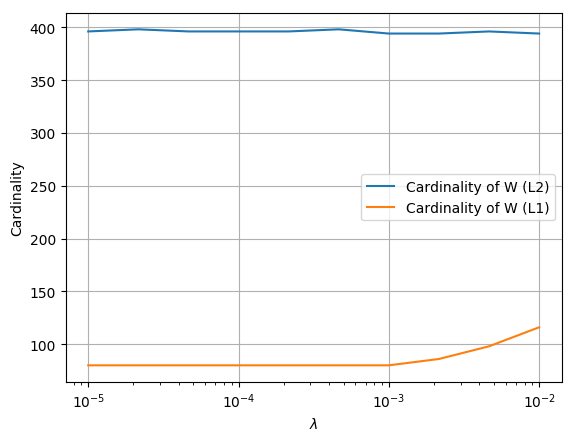

In [3]:
lambda_search = logspace(-5,-2,10);
normalized_residual_L1 = zeros(length(lambda_search));
normalized_residual_L2 = zeros(length(lambda_search));
cardinality_L1 = zeros(length(lambda_search));
cardinality_L2 = zeros(length(lambda_search));

for i=1:length(lambda_search)

    lambda = lambda_search[i]
    
    the = Variable(n+m,n);
    obj = vecnorm(X*the-y)^2;
    obj += lambda*vecnorm(the);
    constraints = the[1:n,1:n] == the[1:n,1:n]';
    constraints += the[1:n,1:n]*ones(n) == ones(n);
    problem = minimize(obj, constraints);
    solve!(problem, ECOSSolver(verbose=0))
    theta = evaluate(the);

    WB = theta';
    W_hat = WB[:,1:n];
    B_hat = WB[:,n+1:end];

    R = vecnorm(X*theta-y)/sqrt(t);
    S = vecnorm(x[:,2:t+1])/sqrt(t);
    normalized_residual_L2[i] = R/S;
    cardinality_L2[i] = sum(abs(W_hat).>=1e-3);
end

for i=1:length(lambda_search)

    lambda = lambda_search[i]
    
    the = Variable(n+m,n);
    obj = vecnorm(X*the-y)^2;
    obj += lambda*sum(abs(the));
    constraints = the[1:n,1:n] == the[1:n,1:n]';
    constraints += the[1:n,1:n]*ones(n) == ones(n);
    problem = minimize(obj, constraints);
    solve!(problem, ECOSSolver(verbose=0))
    theta = evaluate(the);

    WB = theta';
    W_hat = WB[:,1:n];
    B_hat = WB[:,n+1:end];

    R = vecnorm(X*theta-y)/sqrt(t);
    S = vecnorm(x[:,2:t+1])/sqrt(t);
    normalized_residual_L1[i] = R/S
    cardinality_L1[i] = sum(abs(W_hat).>=1e-3);
end

figure();
semilogx(lambda_search, normalized_residual_L2, label="Normalized residual (L2)");
semilogx(lambda_search, normalized_residual_L1, label="Normalized residual (L1)");
legend();
xlabel(L"$\lambda$")
ylabel("Normalized residual")
grid("on")

figure();
#subplot(211);
semilogx(lambda_search, cardinality_L2, label="Cardinality of W (L2)");
#legend();
#xlabel(L"$\lambda$")
#ylabel("Cardinality")
#grid("on")

#subplot(212);
semilogx(lambda_search, cardinality_L1, label="Cardinality of W (L1)");
legend();
xlabel(L"$\lambda$")
ylabel("Cardinality")
grid("on")



With $\lambda = 10^{-4}$, the L2 reconstruction gives:

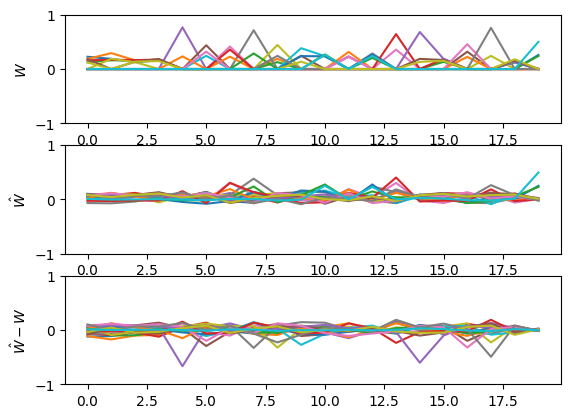

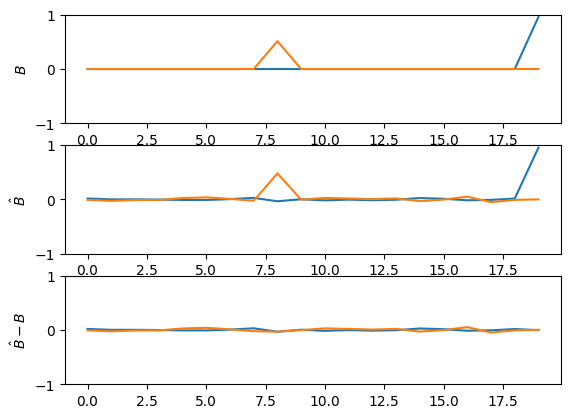

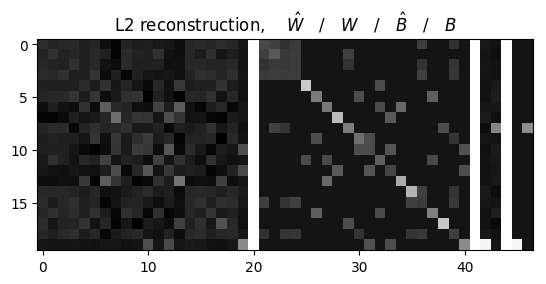

9.130392507723528e-5

In [4]:
lambda = 1e-4;
the = Variable(n+m,n);
obj = vecnorm(X*the-y)^2;
obj += lambda*vecnorm(the);
constraints = the[1:n,1:n] == the[1:n,1:n]';
constraints += the[1:n,1:n]*ones(n) == ones(n);
problem = minimize(obj, constraints);
solve!(problem, ECOSSolver(verbose=0))
theta = evaluate(the);

WB = theta';
W_hat = WB[:,1:n];
B_hat = WB[:,n+1:end];

figure();
subplot(311);plot(W); 
ylabel(L"$W$");
ylim(-1, 1);
subplot(312);plot(W_hat);
ylabel(L"$\hat{W}$");
ylim(-1, 1);
subplot(313);plot(W_hat-W);
ylabel(L"$\hat{W}-W$");
ylim(-1, 1);
figure();
subplot(311);plot(B); 
ylabel(L"$B$");
ylim(-1, 1);
subplot(312);plot(B_hat);
ylabel(L"$\hat{B}$");
ylim(-1, 1);
subplot(313);plot(B_hat-B);
ylabel(L"$\hat{B}-B$");
ylim(-1, 1);

figure();
imshow([W_hat ones(n,1) W ones(n,1) B_hat ones(n,1) B], cmap="gray")
title(L"L2 reconstruction, $\quad \hat{W} \quad/\quad W \quad/\quad \hat{B} \quad/\quad B$");

R = vecnorm(X*theta-y)/sqrt(t);
S = vecnorm(x[:,2:t+1])/sqrt(t);
normalized_residual = R/S

With the same $\lambda = 10^{-4}$, the L1 reconstruction gives:

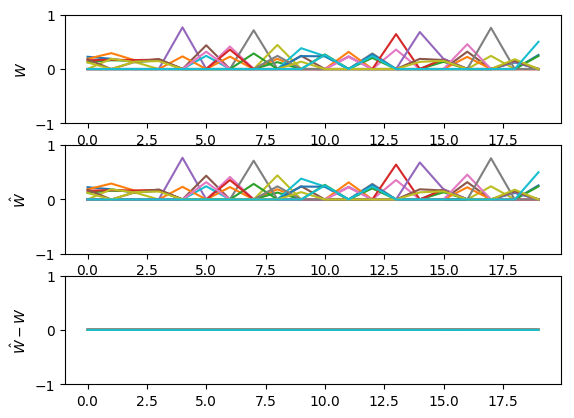

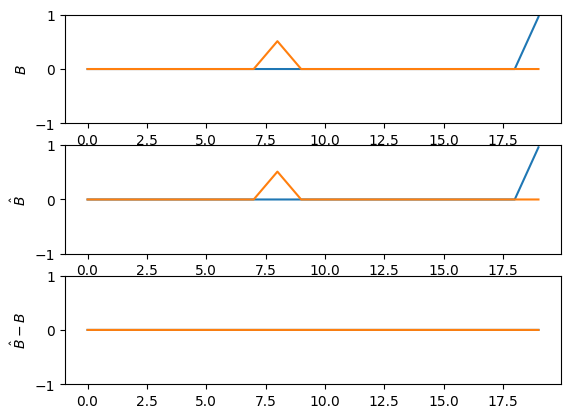

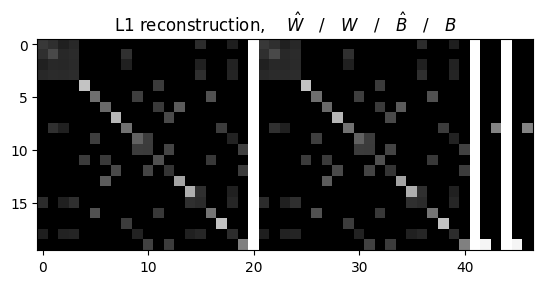

1.6415856334317273e-5

In [5]:
lambda = 1e-4;
the = Variable(n+m,n);
obj = vecnorm(X*the-y)^2;
obj += lambda*sum(abs(the));
constraints = the[1:n,1:n] == the[1:n,1:n]';
constraints += the[1:n,1:n]*ones(n) == ones(n);
problem = minimize(obj, constraints);
solve!(problem, ECOSSolver(verbose=0))
theta = evaluate(the);

WB = theta';
W_hat = WB[:,1:n];
B_hat = WB[:,n+1:end];

figure();
subplot(311);plot(W); 
ylabel(L"$W$");
ylim(-1, 1);
subplot(312);plot(W_hat);
ylabel(L"$\hat{W}$");
ylim(-1, 1);
subplot(313);plot(W_hat-W);
ylabel(L"$\hat{W}-W$");
ylim(-1, 1);
figure();
subplot(311);plot(B); 
ylabel(L"$B$");
ylim(-1, 1);
subplot(312);plot(B_hat);
ylabel(L"$\hat{B}$");
ylim(-1, 1);
subplot(313);plot(B_hat-B);
ylabel(L"$\hat{B}-B$");
ylim(-1, 1);

figure();
imshow([W_hat ones(n,1) W ones(n,1) B_hat ones(n,1) B], cmap="gray")
title(L"L1 reconstruction, $\quad \hat{W} \quad/\quad W \quad/\quad \hat{B} \quad/\quad B$");


R = vecnorm(X*theta-y)/sqrt(t);
S = vecnorm(x[:,2:t+1])/sqrt(t);
normalized_residual = R/S

The reconstructed node degrees and the diagonal weightings are given below.

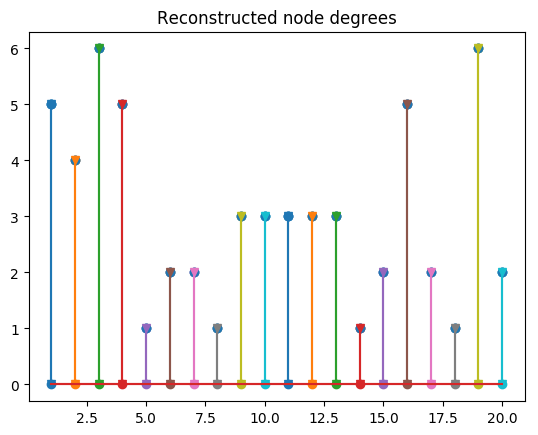

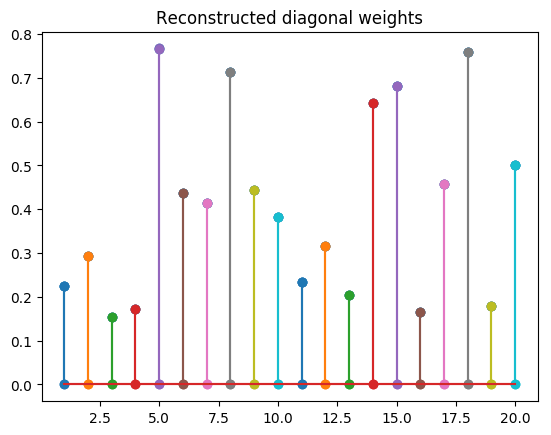

PyObject Text(0.5,1,'Reconstructed diagonal weights')

In [6]:
Adj_L1 = abs(W_hat).>1e-3;
degrees_L1 = sum(Adj_L1,2)-1;

figure();
stem(1:n, sum(G,2), "o-");
stem(1:n, degrees_L1, "v-");
title("Reconstructed node degrees")

figure();
stem(1:n, diag(W), "o-");
stem(1:n, diag(W_hat), "o-");
title("Reconstructed diagonal weights")


Also, we can successfully identify that the noise signals are sent out from node $20$ and node $8$, that is $u_1(t)$ is from node $20$ and $u_2(t)$ from node $8$. 

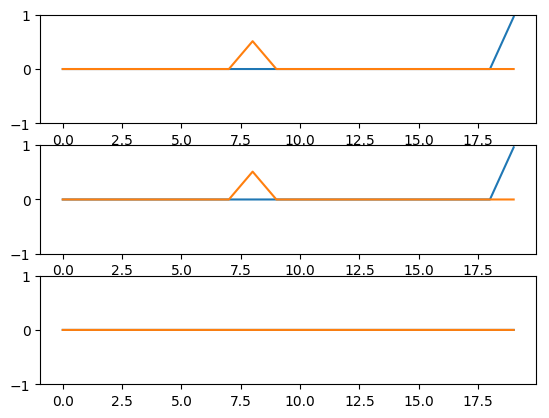

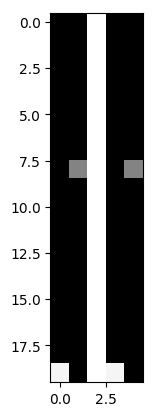

PyObject <matplotlib.image.AxesImage object at 0x7f3a6760b690>

In [7]:
figure();
subplot(311);plot(B); 
ylim(-1, 1);
subplot(312);plot(B_hat);
ylim(-1, 1);
subplot(313);plot(B_hat-B);
ylim(-1, 1);

figure();
imshow([B_hat ones(n,1) B], cmap="gray")